In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27660 non-null  object 
 1   year               27660 non-null  int64  
 2   sex                27660 non-null  object 
 3   age                27660 non-null  object 
 4   suicides_no        27660 non-null  int64  
 5   population         27660 non-null  int64  
 6   suicides/100k_pop  27660 non-null  float64
 7   country-year       27660 non-null  object 
 8   gdp_for_year       27660 non-null  object 
 9   gdp_per_capita     27660 non-null  int64  
 10  generation         27660 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


In [57]:
# Drop rows with year 2016
df = df[df['year'] != 2016]

In [58]:
# Removing spaces from column names
df.rename(columns={"suicides/100k pop":"suicides/100k_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [59]:
# Dropping a useless column
# df.drop(['HDI_for_year'], axis = 1, inplace = True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

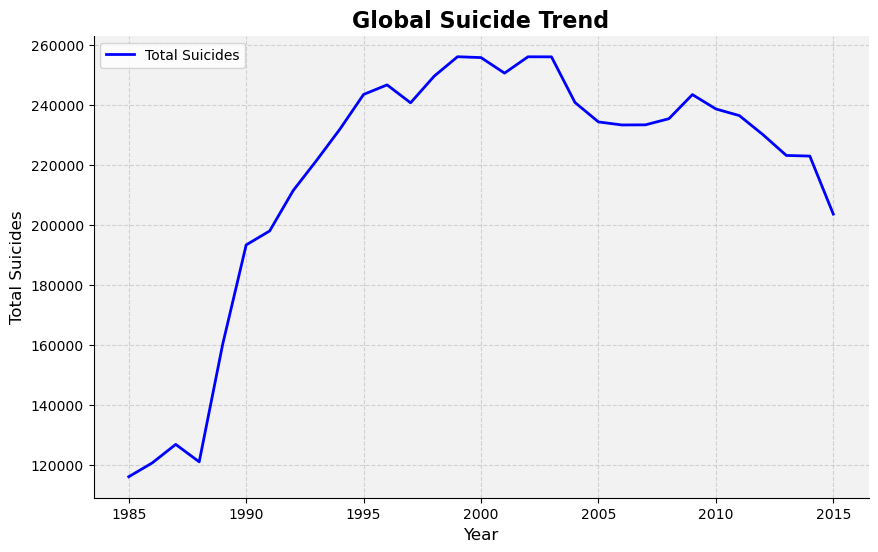

In [69]:
# Q1: Trend of Suicides Globally
# Group the data by year and calculate the total number of suicides
data_grp_year = df.groupby('year')['suicides_no'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))

# Customize the line plot appearance
plt.plot(data_grp_year['year'], data_grp_year['suicides_no'], color='blue', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set axis labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Suicides', fontsize=12)
plt.title('Global Suicide Trend', fontsize=16, fontweight='bold')

# Set axis tick labels font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the legend
plt.legend(['Total Suicides'], loc='upper left', fontsize=10)

# Show the plot
plt.show()

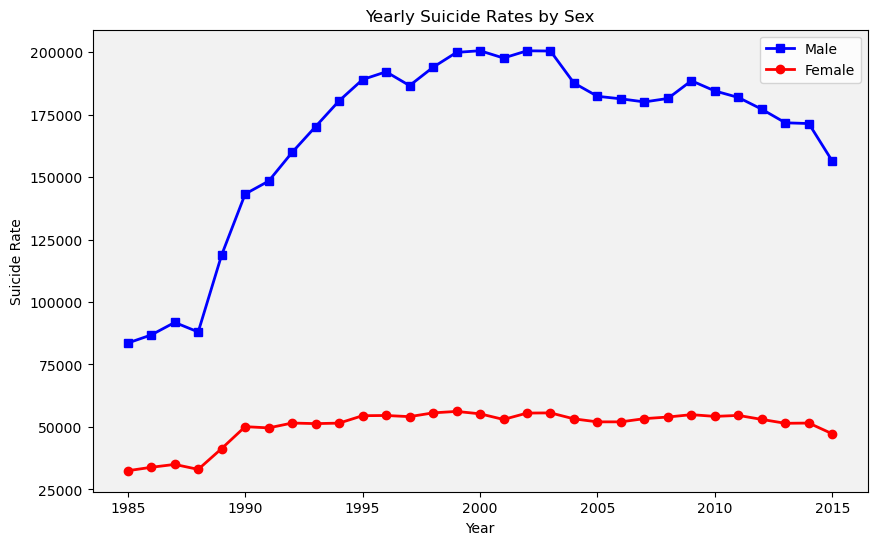

In [70]:
# Q2: Trend of Sex-based suicide rates
sex_grouped_data = df.groupby(['year', 'sex'])['suicides_no'].sum().reset_index()

df_female = sex_grouped_data[sex_grouped_data.sex == "female"]

df_male = sex_grouped_data[sex_grouped_data.sex == "male"]


plt.figure(figsize=(10, 6))
plt.plot(df_male['year'], df_male['suicides_no'], label='Male', color='blue', linewidth=2, marker='s')
plt.plot(df_female['year'], df_female['suicides_no'], label='Female', color='red', linewidth=2, marker='o')
plt.xlabel('Year')
# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')
plt.ylabel('Suicide Rate')
plt.title('Yearly Suicide Rates by Sex')
plt.legend()
plt.show()

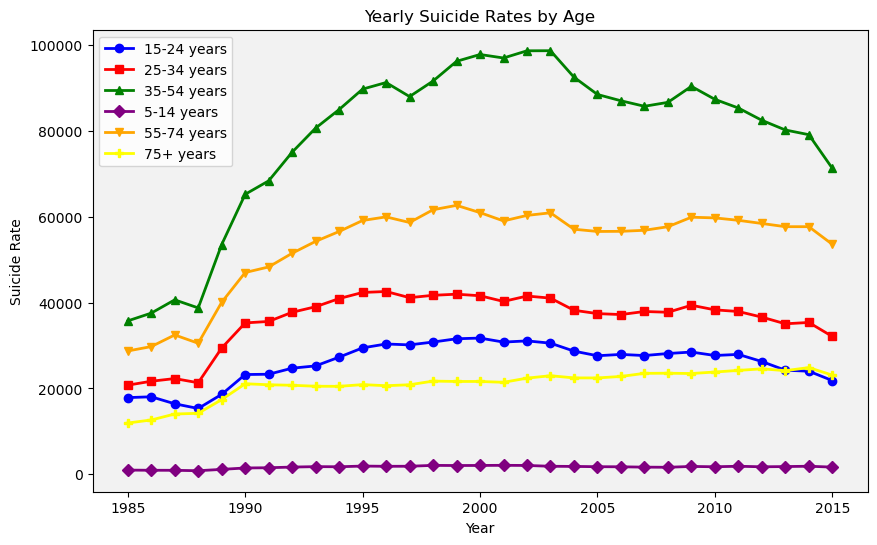

In [71]:
# Q3: Trend of Age-based suicide rates
age_grouped_data = df.groupby(['year', 'age'])['suicides_no'].sum().reset_index()

age_groups = age_grouped_data['age'].unique()
age_data = {}

for age_group in age_groups:
    age_data[age_group] = age_grouped_data[age_grouped_data['age'] == age_group]


plt.figure(figsize=(10, 6))

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow']  
markers = ['o', 's', '^', 'D', 'v', 'P']  

for age_group, color, marker in zip(age_groups, colors, markers):
    age_group_data = age_data[age_group]
    plt.plot(age_group_data['year'], age_group_data['suicides_no'], label=age_group, color=color, linewidth=2, marker=marker)

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Yearly Suicide Rates by Age')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

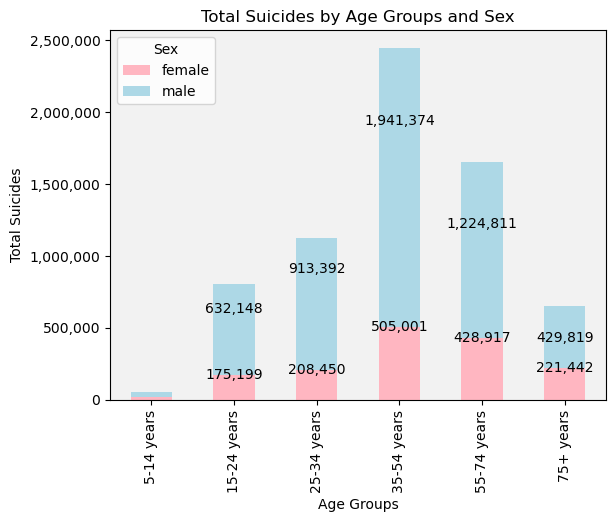

In [72]:
# Q4: Age groups and sex
import matplotlib.ticker as mticker

# Group the data by age, sex, and calculate the total number of suicides for each group
grouped_data = df.groupby(['age', 'sex'])['suicides_no'].sum().unstack()

# Reorder the age groups
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
grouped_data = grouped_data.reindex(age_order)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))


# Plot the stacked bars
grouped_data.plot(kind='bar', stacked=True, color=['lightpink','lightblue'])

plt.xlabel('Age Groups')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Age Groups and Sex')

for i, column in enumerate(grouped_data.columns):
    for j, value in enumerate(grouped_data[column]):
        # Skip the first stacked bar because they get mixed up together
        if i == 0 and j == 0:
            continue  
        if i == 1 and j == 0:
            continue 
        plt.text(j, grouped_data.iloc[j][column], f"{value:,}", ha='center', va='center')
        
plt.legend(title='Sex', loc='upper left')

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

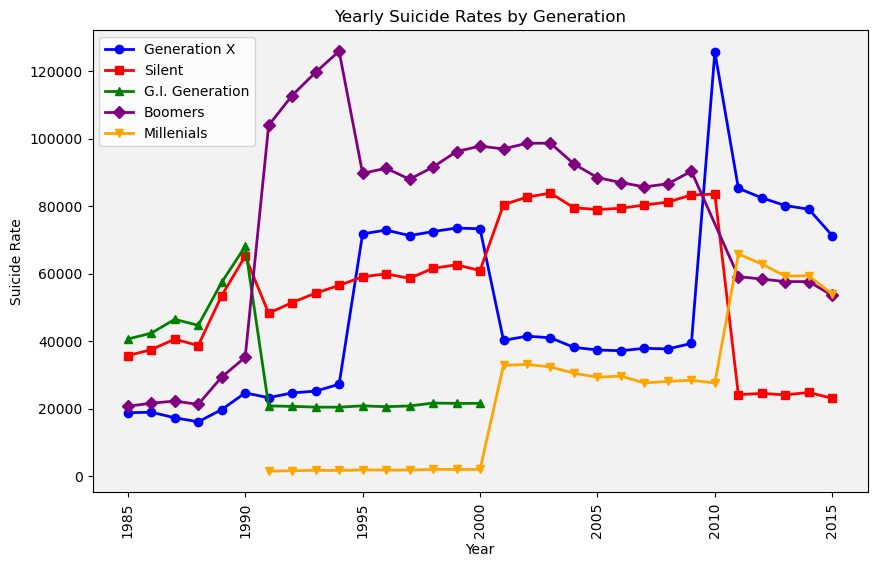

In [73]:
# Q5: Trend of Generation-based suicide rates
gen_grouped_data = df.groupby(['year', 'generation'])['suicides_no'].sum().reset_index()
generations = df['generation'].unique()
generation_data = {}

for generation in generations:
    generation_data[generation] = gen_grouped_data[gen_grouped_data['generation'] == generation]

plt.figure(figsize=(10, 6))

colors = ['blue', 'red', 'green', 'purple', 'orange']  
markers = ['o', 's', '^', 'D', 'v']  

for generation, color, marker in zip(generations, colors, markers):
    generation_group_data = generation_data[generation]
    plt.plot(generation_group_data['year'], generation_group_data['suicides_no'], label=generation, color=color, linewidth=2, marker=marker)

plt.xlabel('Year')
# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')
plt.ylabel('Suicide Rate')
plt.title('Yearly Suicide Rates by Generation')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

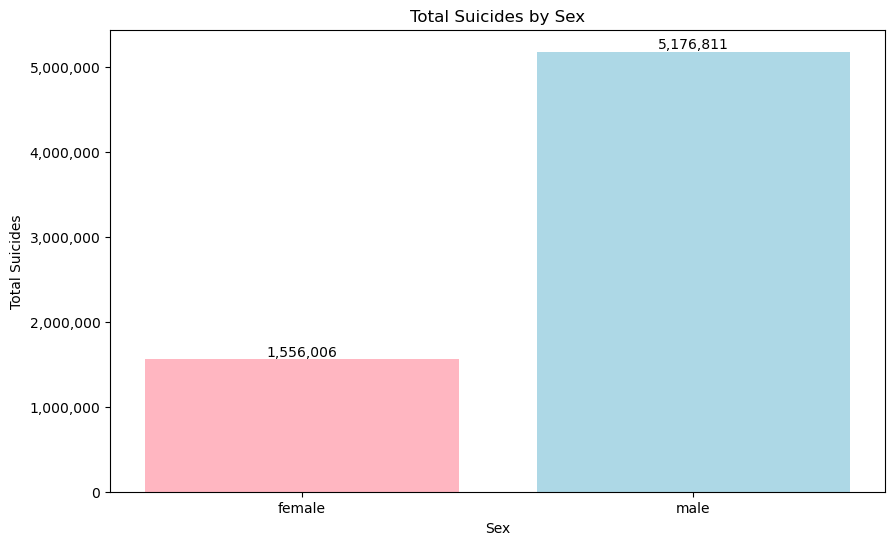

In [64]:
# Q6: Total number of suicides based on sex from 1985 to 2015
import matplotlib.ticker as mticker
sex = df.groupby('sex')['suicides_no'].sum()

plt.figure(figsize=(10, 6))

plt.bar(sex.index, sex, color=['lightpink','lightblue'])


plt.xlabel('Sex')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Sex')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
for i, value in enumerate(sex):
    plt.text(i, value, f'{value:,.0f}', ha='center', va='bottom')

plt.show()

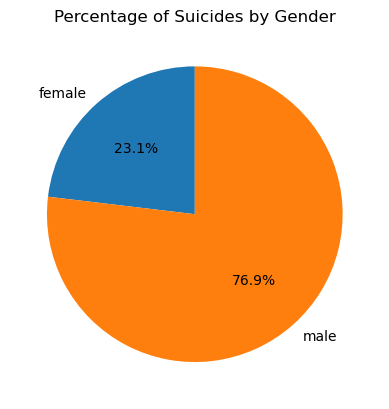

In [74]:
# Q7: Percentage of suicides based on sex from 1985 to 2015

total_suicides_by_gender = df.groupby('sex')['suicides_no'].sum()

# Calculate the percentage of suicides by gender
percentage_suicides_by_gender = total_suicides_by_gender / total_suicides_by_gender.sum() * 100

# Create a pie chart of the percentage of suicides by gender
plt.pie(percentage_suicides_by_gender, labels=percentage_suicides_by_gender.index, autopct='%1.1f%%', startangle=90)

# Set title
plt.title('Percentage of Suicides by Gender')

# Display the pie chart
plt.show()

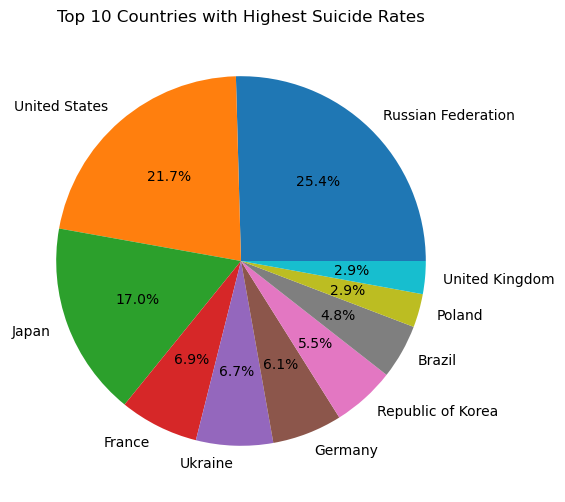

In [7]:
# Q8: Top 10 Countries with Highest Suicide Rates
country_suicides = df.groupby('country')['suicides_no'].sum()

top_countries = country_suicides.sort_values(ascending=False).head(10)

# Create a pie chart
plt.figure(figsize=(10, 6))

# Extract the top countries and their corresponding suicide rates
labels = top_countries.index
values = top_countries.values

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('Top 10 Countries with Highest Suicide Rates')

plt.show()

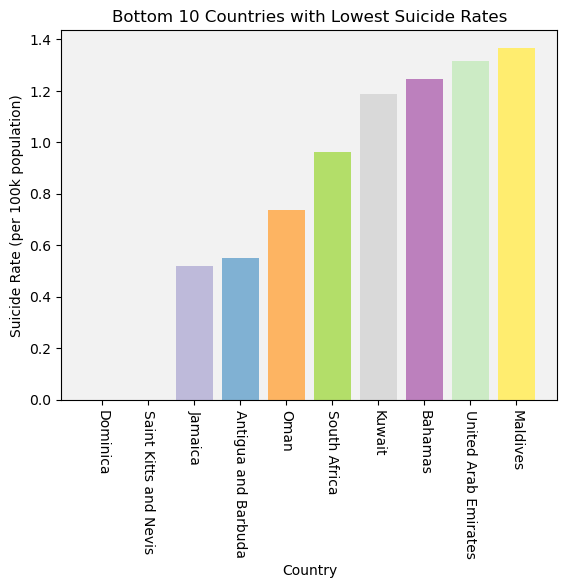

In [75]:
# Q9: Bottom 10 Countries with Lowest Suicide Rates

# Group data by country and calculate the average suicide rate per 100k population
avg_suicide_rate = df.groupby('country')['suicides/100k_pop'].mean()

# Sort the average suicide rates in ascending order and select the bottom 10 countries
bottom_10_countries = avg_suicide_rate.nsmallest(10)

# Generate a list of colors for each bar
colors = plt.cm.Set3(np.linspace(0, 1, len(bottom_10_countries)))

# Create a bar plot of the bottom 10 countries' suicide rates with different colors
plt.bar(bottom_10_countries.index, bottom_10_countries, color=colors)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Bottom 10 Countries with Lowest Suicide Rates')

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=270)

# Display the bar plot
plt.show()

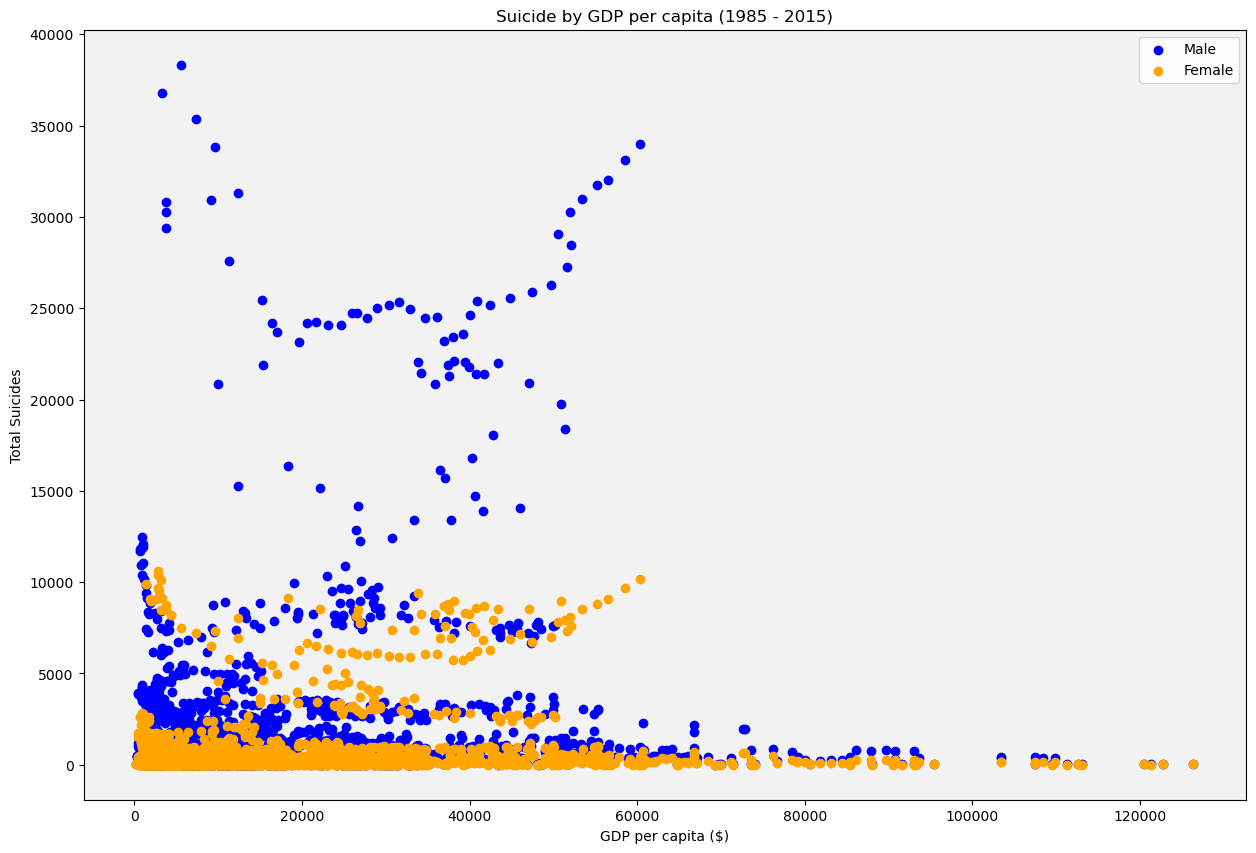

In [76]:
# Q10: GDP wise suicide rates
# Group the data by country, year, sex, and GDP per capita, and calculate the total suicides
data_grp_gdp_2 = df.groupby(['country', 'year', 'sex', 'gdp_per_capita']).agg({"suicides_no": 'sum'}).reset_index()
data_grp_gdp_2.columns = ["country", "year", "sex", "gdp_per_capita", "total_suicide"]

# Filter the data for total suicides less than 40000
data_grp_gdp_cng = data_grp_gdp_2[data_grp_gdp_2['total_suicide'] < 40000]

# Create a scatter plot
plt.figure(figsize=(15, 10))

# Plot the scatter plot for each gender
plt.scatter(data_grp_gdp_cng[data_grp_gdp_cng['sex'] == 'male']['gdp_per_capita'],
            data_grp_gdp_cng[data_grp_gdp_cng['sex'] == 'male']['total_suicide'],
            color='blue', label='Male')

plt.scatter(data_grp_gdp_cng[data_grp_gdp_cng['sex'] == 'female']['gdp_per_capita'],
            data_grp_gdp_cng[data_grp_gdp_cng['sex'] == 'female']['total_suicide'],
            color='orange', label='Female')

# Set labels and title
plt.xlabel('GDP per capita ($)')
plt.ylabel('Total Suicides')
plt.title('Suicide by GDP per capita (1985 - 2015)')

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')

# Add a legend
plt.legend()


plt.show()

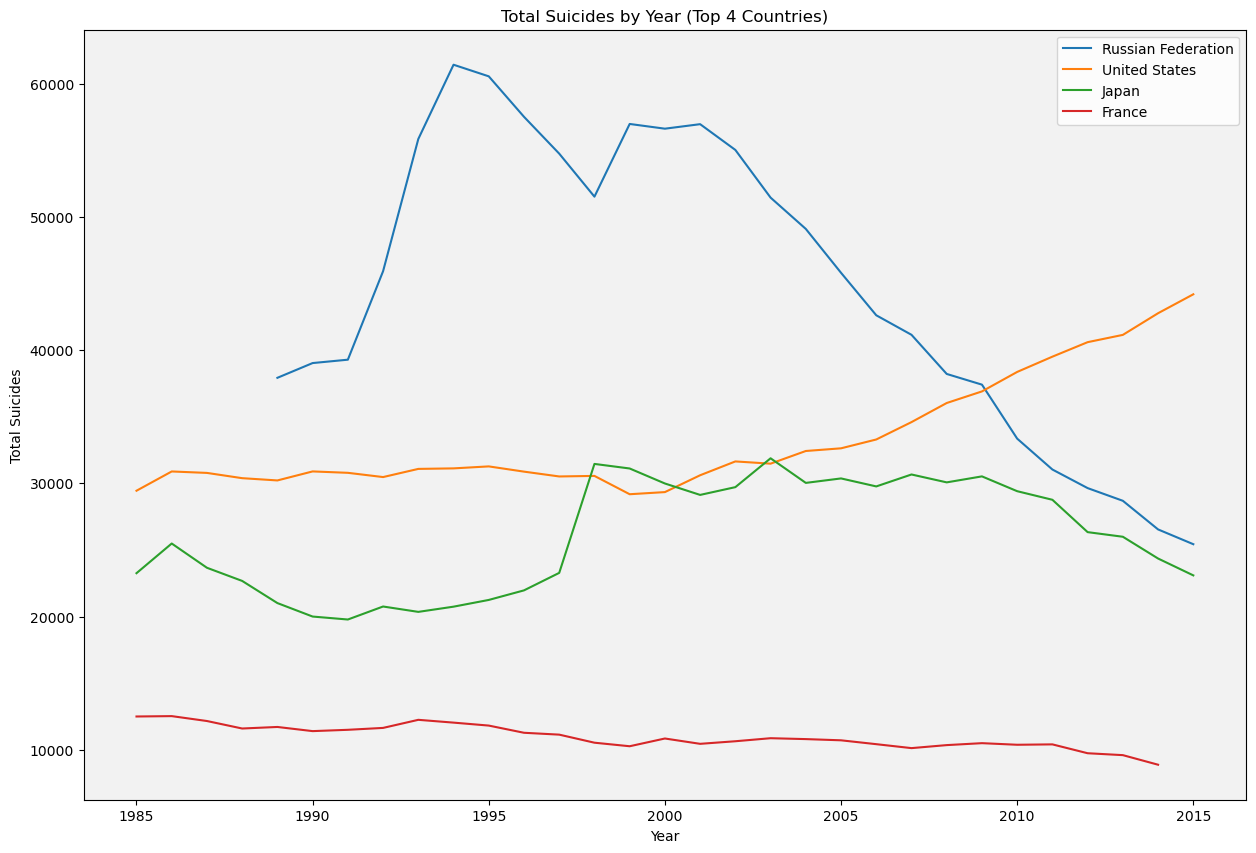

In [77]:
# Q11: Comparing the suicide trend of TOP 4 Countries with Highest suicide rates
data_grp_country = df.groupby('country').agg({"suicides_no": 'sum'}).reset_index()
data_grp_country = data_grp_country.sort_values(by='suicides_no', ascending=False).head(4)

top_countries = data_grp_country['country'].tolist()

data_top_countries = df[df['country'].isin(top_countries)]

data_grp_gdp = data_top_countries.groupby(['country', 'year', 'gdp_per_capita']).agg({"suicides_no": 'sum'}).reset_index()
data_grp_gdp.columns = ["country", "year", "gdp_per_capita", "total_suicide"]

plt.figure(figsize=(15, 10))

for country in top_countries:
    data_country = data_grp_gdp[data_grp_gdp['country'] == country]
    plt.plot(data_country['year'], data_country['total_suicide'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title('Total Suicides by Year (Top 4 Countries)')

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')

plt.legend()

plt.show()

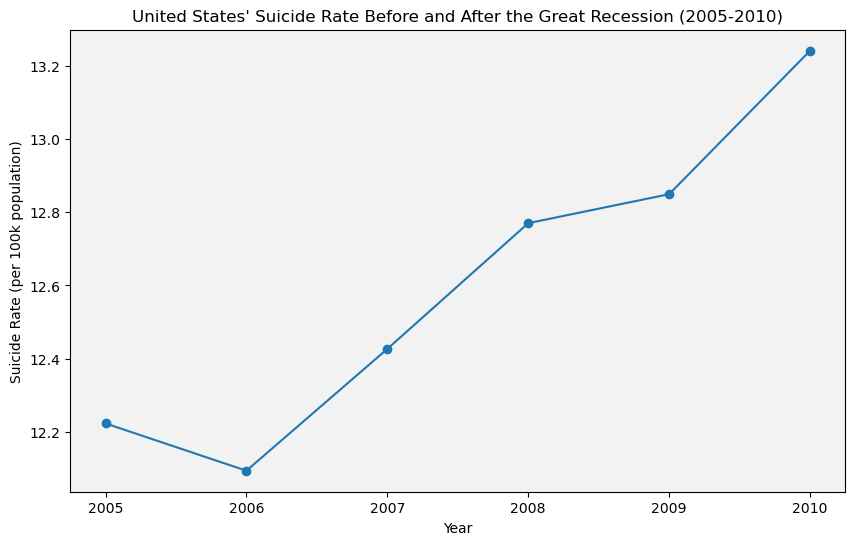

In [78]:
# Q12: Years leading to and after the Great Recession of 2008
us_data = df[df['country'] == 'United States']

# Filter data for the years leading to and after the Great Recession (2005-2010)
recession_years = range(2005, 2011)
us_recession_data = us_data[us_data['year'].isin(recession_years)]

# Group data by year and calculate the average suicide rate per 100k population
avg_suicide_rate = us_recession_data.groupby('year')['suicides/100k_pop'].mean()

# Create a line plot of the average suicide rate
plt.figure(figsize=(10, 6))
plt.plot(avg_suicide_rate, marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title("United States' Suicide Rate Before and After the Great Recession (2005-2010)")

# Set x-axis ticks to display all years
plt.xticks(avg_suicide_rate.index)

# Add a background color to the plot
plt.gca().set_facecolor('#f2f2f2')

# Display the line plot
plt.show()

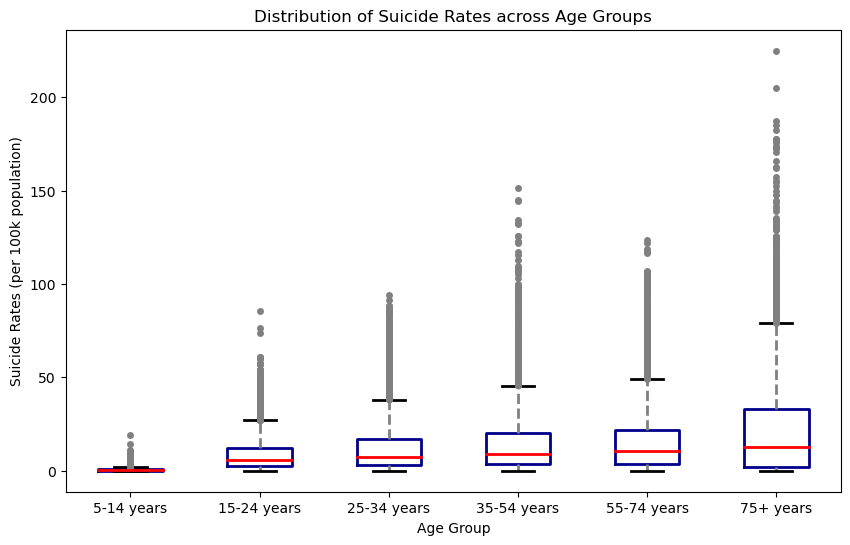

In [66]:
# Q13: Distribution of Suicide Rates across Age Groups
# Create a boxplot
plt.figure(figsize=(10, 6))

# Customize the boxplot appearance
boxprops = dict(linewidth=2, color='darkblue')
whiskerprops = dict(linewidth=2, color='gray', linestyle='--')
capprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='red')
flierprops = dict(marker='o', markersize=5, markerfacecolor='gray', markeredgecolor='none')

# Plot the boxplot
plt.boxplot([df[df['age'] == '5-14 years']['suicides/100k_pop'],
             df[df['age'] == '15-24 years']['suicides/100k_pop'],
             df[df['age'] == '25-34 years']['suicides/100k_pop'],
             df[df['age'] == '35-54 years']['suicides/100k_pop'],
             df[df['age'] == '55-74 years']['suicides/100k_pop'],
             df[df['age'] == '75+ years']['suicides/100k_pop']],
            labels=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'],
            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Suicide Rates (per 100k population)')
plt.title('Distribution of Suicide Rates across Age Groups')

# Show the plot
plt.show()

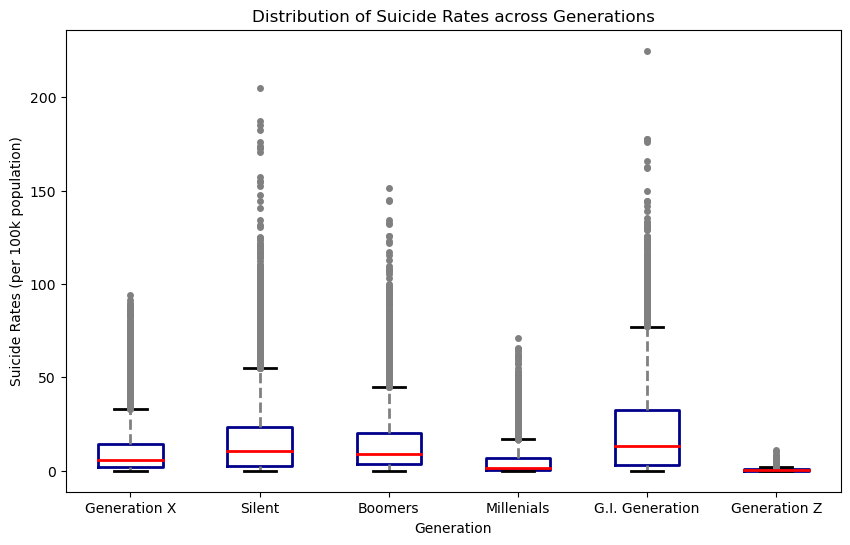

In [67]:
# Q14: Distribution of Suicide Rates across Generations
plt.figure(figsize=(10, 6))

# Customize the boxplot appearance
boxprops = dict(linewidth=2, color='darkblue')
whiskerprops = dict(linewidth=2, color='gray', linestyle='--')
capprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='red')
flierprops = dict(marker='o', markersize=5, markerfacecolor='gray', markeredgecolor='none')

# Plot the boxplot
plt.boxplot([df[df['generation'] == 'Generation X']['suicides/100k_pop'],
             df[df['generation'] == 'Silent']['suicides/100k_pop'],
             df[df['generation'] == 'Boomers']['suicides/100k_pop'],
             df[df['generation'] == 'Millenials']['suicides/100k_pop'],
             df[df['generation'] == 'G.I. Generation']['suicides/100k_pop'],
             df[df['generation'] == 'Generation Z']['suicides/100k_pop']],
            labels=['Generation X', 'Silent', 'Boomers', 'Millenials', 'G.I. Generation', 'Generation Z'],
            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops, flierprops=flierprops)

# Set labels and title
plt.xlabel('Generation')
plt.ylabel('Suicide Rates (per 100k population)')
plt.title('Distribution of Suicide Rates across Generations')

# Show the plot
plt.show()